In [1]:
from sklearn import tree, model_selection, metrics
from pandas import DataFrame
import numpy as np

Загрузим датасет и посмотрим на данные

In [2]:
data_file = open('german.data', 'r')
raw_feature = []
target=[]
for line in data_file:
    arr = line.split()
    raw_feature.append(arr[:-1])
    target.append(arr[-1])    

In [3]:
data_frame = DataFrame(raw_feature)
raw_feature_names = ['Status of existing checking account',
                      'Duration in month',
                      'Credit history',
                      'Purpose',
                      'Credit amount',
                      'Savings account/bonds',
                      'Present employment since',
                      'Installment rate in percentage of disposable income',
                      'Personal status and sex',
                      'Other debtors / guarantors',
                      'Other debtors / guarantors',
                      'Property',
                      'Age in years',
                      'Other installment plans',
                      'Housing',
                      'Number of existing credits at this bank',
                      'Job',
                      'Number of people being liable to provide maintenance for',
                      'Telephone',
                      'foreign worker']

data_frame.columns = raw_feature_names
data_frame['TARGET'] = target
data_frame.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,TARGET
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Датасет содержит как числовые, так и категориальные признаки. Числовые необходимо преобразовать к соответствующему формату; для каждого категориального заведём по признаку с бинарными значениями на каждую категорию. Найдём все встречающиеся значения категориальных признаков, затем составим новую таблицу признаков, в которой уже все значения будут числовыми.

In [4]:
feature_value_sets = [0 if (feature_index+1 in (2, 5, 8, 11, 13, 16, 18))
                      else set(data_frame.iloc[:,feature_index]) for feature_index in xrange(20)]

feature_value_sets
            

[{'A11', 'A12', 'A13', 'A14'},
 0,
 {'A30', 'A31', 'A32', 'A33', 'A34'},
 {'A40', 'A41', 'A410', 'A42', 'A43', 'A44', 'A45', 'A46', 'A48', 'A49'},
 0,
 {'A61', 'A62', 'A63', 'A64', 'A65'},
 {'A71', 'A72', 'A73', 'A74', 'A75'},
 0,
 {'A91', 'A92', 'A93', 'A94'},
 {'A101', 'A102', 'A103'},
 0,
 {'A121', 'A122', 'A123', 'A124'},
 0,
 {'A141', 'A142', 'A143'},
 {'A151', 'A152', 'A153'},
 0,
 {'A171', 'A172', 'A173', 'A174'},
 0,
 {'A191', 'A192'},
 {'A201', 'A202'}]

In [5]:
feature = []
for y in raw_feature:
    feature_line = []
    for feature_index in xrange(20):
        if feature_index + 1 in (2, 5, 8, 11, 13, 16, 18):
            feature_line.append(int(y[feature_index]))
        else:
            feature_line +=([1 if y[feature_index] == value else 0
                                 for value in feature_value_sets[feature_index]])
    feature.append(feature_line)
    
feature_names = []

for feature_index in xrange(20):
    if feature_value_sets[feature_index] == 0:
        feature_names.append(raw_feature_names[feature_index])
    else:
        feature_names += [raw_feature_names[feature_index] + " = {}".format(value)
                          for value in feature_value_sets[feature_index]]

Построим решающее дерево из sklearn для данной выборки

In [6]:
feature_frame = DataFrame(feature)
feature_frame.columns = feature_names
feature_frame.head()

,Status of existing checking account = A14,Status of existing checking account = A11,Status of existing checking account = A13,Status of existing checking account = A12,Duration in month,Credit history = A33,Credit history = A32,Credit history = A31,Credit history = A30,Credit history = A34,...,Number of existing credits at this bank,Job = A174,Job = A173,Job = A172,Job = A171,Number of people being liable to provide maintenance for,Telephone = A191,Telephone = A192,foreign worker = A201,foreign worker = A202
0,0,1,0,0,6,0,0,0,0,1,...,2,0,1,0,0,1,0,1,1,0
1,0,0,0,1,48,0,1,0,0,0,...,1,0,1,0,0,1,1,0,1,0
2,1,0,0,0,12,0,0,0,0,1,...,1,0,0,1,0,2,1,0,1,0
3,0,1,0,0,42,0,1,0,0,0,...,1,0,1,0,0,2,1,0,1,0
4,0,1,0,0,24,1,0,0,0,0,...,2,0,1,0,0,2,1,0,1,0


In [7]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(feature, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [8]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                         feature_names=feature_names,  
                         class_names=['Good', 'Bad'],  
                         filled=True, rounded=True,  
                         special_characters=True)  

In [9]:
import pydotplus 
from IPython.display import Image
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png()) 

InvocationException: GraphViz's executables not found

К моему глубочайшему сожалению, запустить GraphViz прямо из кода не получилось. Но нужный рисунок в виде png файла, тем не менее, лежит в этой же директории.

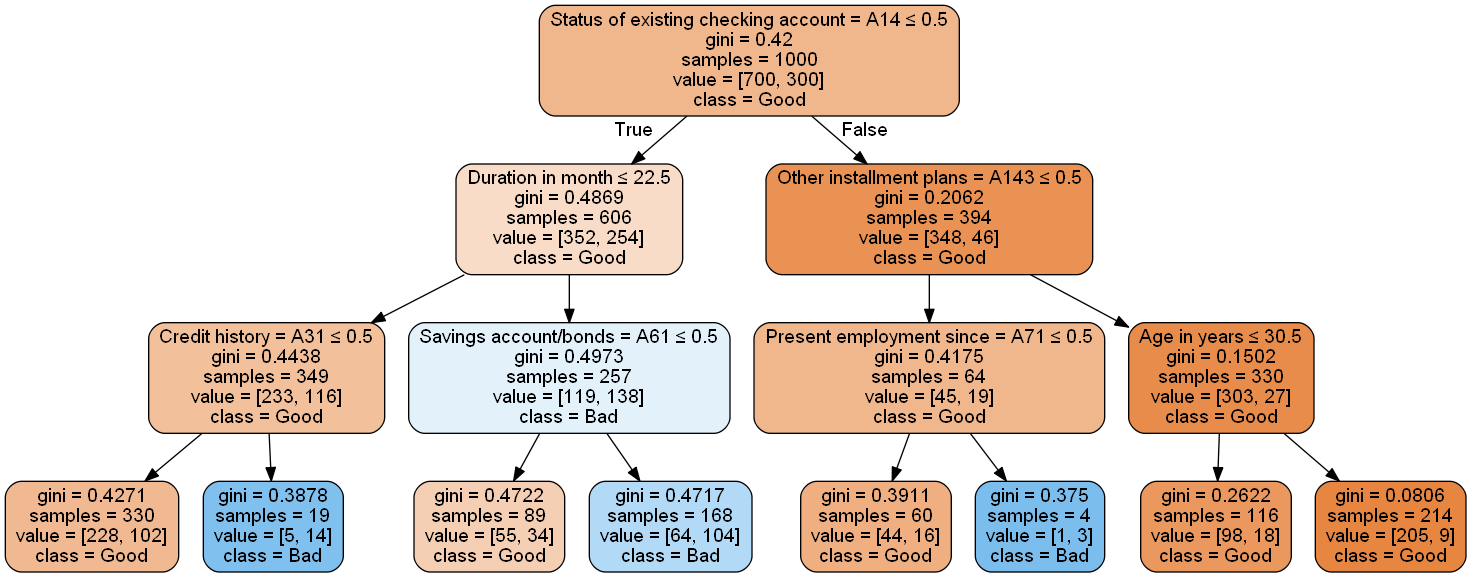

In [10]:
Image('small_tree.png')

Посмотрим на описания признаков из документации к датасету.

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account 

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none 

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank) 

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account 

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years 

По правой ветке дерева, плохими оказываются клиенты, которые имеют счёт в этом банке, не выплачивают задолженность банкам и нигде не работают. Безработные клиенты могут так и не найти работу и не заработают денег на возврат кредита. Также (по левой ветке) плохими оказываются клиенты, не имеющие счёта в банке, берущие кредит больше чем на два года, имеющие ценными бумагами менее ста марок (минимальная сумма). Видимо, эти люди как правило недостаточно материально обеспечены, плюс их прибыли и убытки за два года довольно непредсказуемы, так как срок велик.

In [16]:
depth_range = range(1,20)
train_scores = []
cv_scores = []
for depth in depth_range:
    model = tree.DecisionTreeClassifier(max_depth=depth)
    model.fit(feature, target)
    train_scores.append(metrics.accuracy_score(target, model.predict(feature)))
    cv_scores.append(model_selection.cross_val_score(model, feature, target).mean())

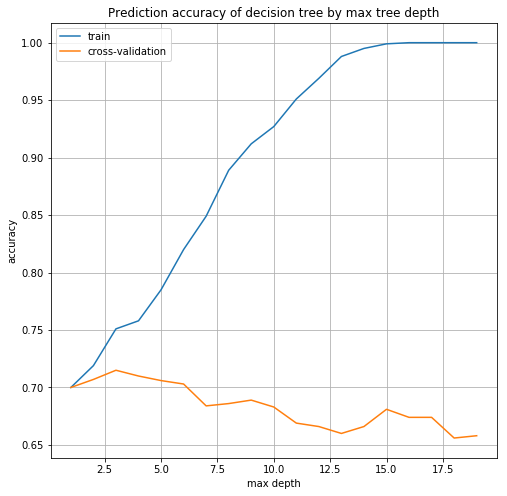

In [18]:
from matplotlib import pyplot
%matplotlib inline

pyplot.figure(figsize=(8,8))
pyplot.plot(depth_range, train_scores, label='train')
pyplot.plot(depth_range, cv_scores, label='cross-validation')
pyplot.ylabel('accuracy')
pyplot.xlabel('max depth')
pyplot.legend()
pyplot.grid()
pyplot.title('Prediction accuracy of decision tree by max tree depth')


На обучающей выборке accuracy неуклонно растёт, поскольку дерево всё больше приспосабливается к данным из обучающей выборки. В конечном счёте при глубине более 15 уровней достигается 100% точность: фактически, дерево осуществляет полный перебор комбинаций признаков, встречающихся в выборке. При этом accuracy на кросс-валидации немонотонно, но ощутимо убывает. Это свидетельствует о переобучении модели.

In [26]:
print (u'Максимальная точность на кросс-валидации \
достигается при ограничении глубины до {} и составляет {}%'.format(np.argmax(cv_scores)+1,
                                                                   np.max(cv_scores)*100))

Максимальная точность на кросс-валидации достигается при ограничении глубины до 3 и составляет 71.499343655%
